In [102]:
import pandas as pd
location='/Users/mithleshpatel/anaconda2/zipzap/Data_File/'
arr=[]
with open(location+'_chat-5.txt') as f:
    lines = f.readlines()
    arr.append(lines)
    

In [103]:
hisaab=[]
for element in arr:
    for el in element:
        hisaab.append(el)

In [104]:
df = pd.DataFrame()
total=0
for x in hisaab:
    if x.count(':')==5:
        group1 = x.split(',')
        group2 = group1[1].split(':')
        ':'.join(group2[:3]), ':'.join(group2[3:])
        total = total+float(group2[5].rstrip())
        df = df.append({'Date': group1[0], 'Name': group2[3], 'Desc': group2[4],'Amount' : group2[5].rstrip()}, ignore_index=True)
        


In [105]:
import numpy as np
df = df[['Date','Name','Desc','Amount']]
df['Amount'] = df['Amount'].astype(float)
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
#df['YearMonth'] = df['Date'].map(lambda x: 10*x.year + x.month)
df['YearMonth'] = df['Date'].apply(lambda x:x.strftime('%Y%m'))
df.to_csv('/Users/mithleshpatel/anaconda2/zipzap/Data_File/Hisaab.csv')
df

,Date,Name,Desc,Amount,YearMonth
0,2017-12-09,Mith,Haircut,10.00,201712
1,2017-12-09,Mith,Grocery,20.00,201712
2,2017-12-09,Mith,Transport,407.50,201712
3,2017-12-09,Mith,Transport,107.60,201712
4,2017-12-09,Mith,Spark Energy,85.25,201712
5,2017-12-09,Mith,TV,24.50,201712
6,2017-12-09,Mith,Gym,24.99,201712
7,2017-12-09,Gudiya Lyca,Grocery,2.37,201712
8,2017-12-09,Gudiya Lyca,Rent,895.00,201712
9,2017-12-11,Mith,Grocery,4.00,201712


Total expense : 2548.26


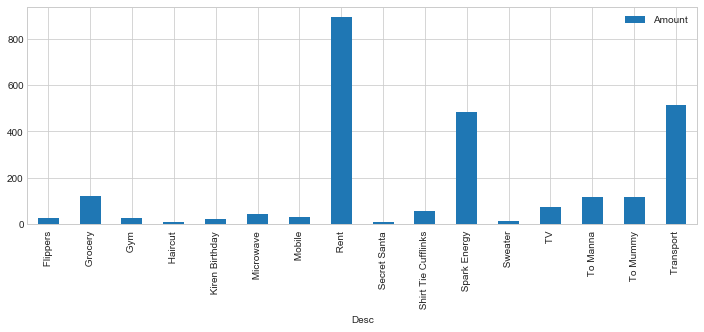

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
df['Amount'] = df['Amount'].astype(float)
#df=df.sort_values('Amount',inplace=True)
d2=df.groupby(['Desc']).sum()
print "Total expense : %.2f" %total
d2.plot(kind='bar',figsize=(12,4))

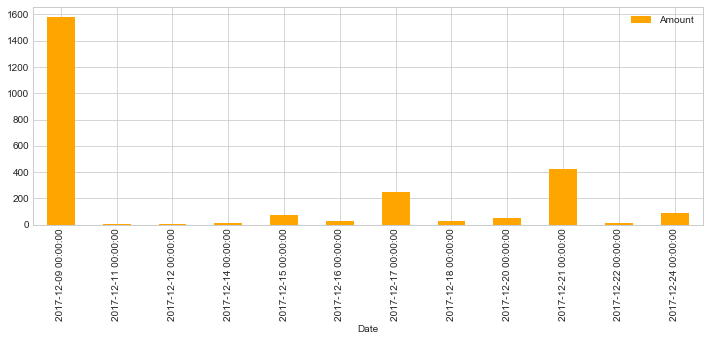

In [107]:
d3=df.groupby(['Date']).sum()
d3.plot(kind='bar',figsize=(12,4),color='orange')

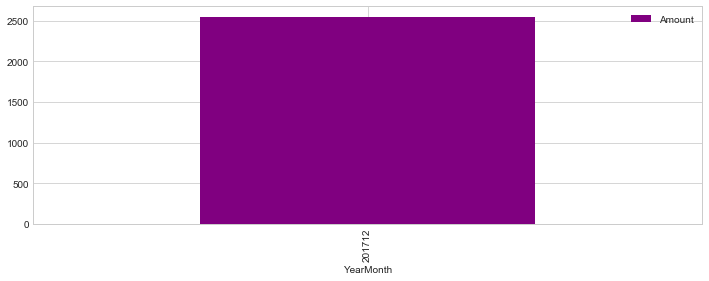

In [108]:
d3=df.groupby(['YearMonth']).sum()
d3.plot(kind='bar',figsize=(12,4),color='purple')